# **Initiation à l'apprentissage machine et au décoding avec le Modèle Quadratic Integrated and Fire**

#### Importation des modules et définition du modèle

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#%matplotlib tk

#### Définition des fonctions du modèle neuronal choisi

In [3]:
dt = .1
time = np.arange(0, 1000, dt)

def Input(time=time, tau_n=10, I_n=1, I_0=0.005, start=100, end=900):
    
    """
    Génération d'un input bruité 
    time (array) : vecteur de temps
    tau_n (float) : constante de temps de l'évolution temporel de l'input
    I_n (float) : variabilité de l'input
    I_0 (float) : niveau de base de l'input
    start (int) : début de la stimulation
    end (int) : fin de la stimulation
    return :
        - I (array) : valeur de l'input à chaque unité de temps
    """

    dt = time[1]
    I = np.ones_like(time)
    for t in range(len(I) - 1) :
        n = np.random.randn() * I_n
        I[t+1] = (1 - dt/tau_n) * I[t]+ (dt * n/tau_n)
    I += I_0
    I[time<start], I[time>end] = 0, 0
    return I

def RQIF(time=time, I=[], v_spike= 1, a=0.01, b=0.01, c=0.01, d=0.01):
    
    """
    Modèle "Quadratic Integrated and Fire"
    time (array) : vecteur de temps
    v_spike (float) : valeur du spike
    a, b, c, d (float) : paramètres mathématiques du modèle
    return :
        - V (array) : évolution temporelle du potentiel membranaire
        - U (array) : évolution temporelle du niveau de calcium intraqcellulaire
    """

    V = np.zeros_like(time) * c
    U = np.zeros_like(time)
    dt = time[1]
    for t in range(len(time) - 1) :
        dV = dt * (V[t]**2 - U[t] + I[t])
        dU = dt * (a * (b * V[t] - U[t]))
        V[t+1] = V[t] + dV
        U[t+1] = U[t] + dU
        if V[t] >= v_spike :
            V[t+1] = c
            U[t+1] = U[t]+d
    return V, U

#### Première génération

In [4]:
# Génération d'un stimulus bruité et de l'activité neuronale induite
I = Input(time=time, tau_n=10, I_n=1, I_0=0.005, start=100, end=900)
V, U = RQIF(time=time, I=I, a=0.01, b=0.01, c=0.01, d=0.01)

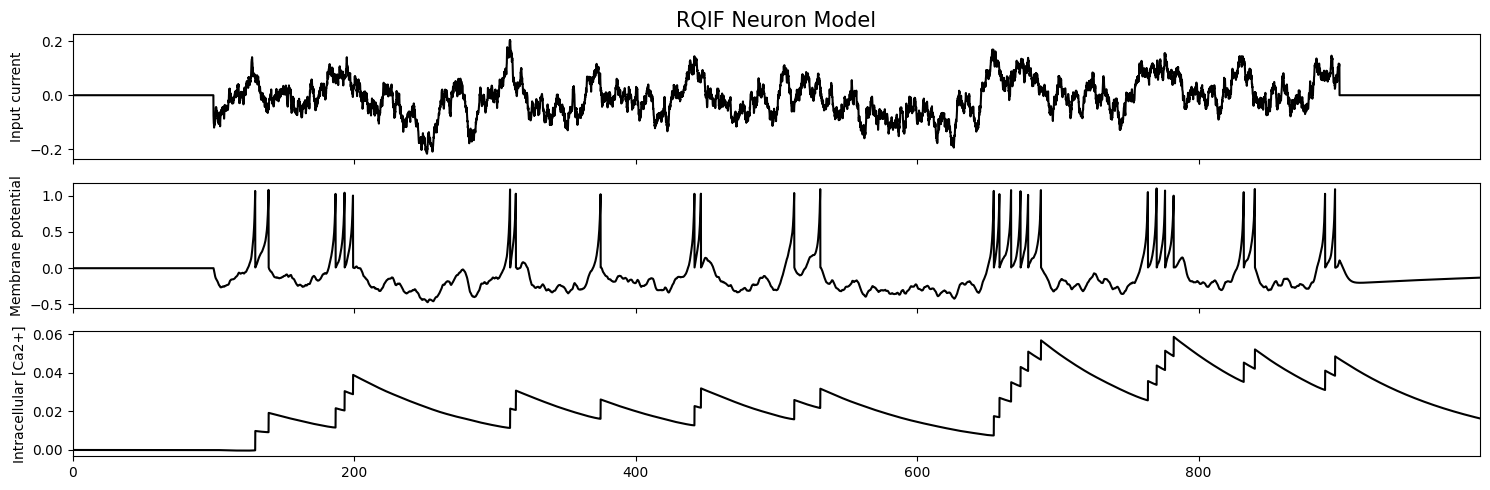

In [5]:
# Représentation graphique
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(15,5), sharex=True)
ax[0].set_title("RQIF Neuron Model", size=15)
ax[0].plot(time, I, color="black")
ax[0].set_ylabel("Input current", size=10)
ax[1].plot(time, V, color="black")
ax[1].set_ylabel("Membrane potential", size=10)
ax[2].plot(time, U, color="black")
ax[2].set_ylabel("Intracellular [Ca2+]", size=10)
ax[2].set_xlim(time[0], time[-1])
plt.tight_layout()
plt.show()

#### Petite étude de l'influence des différents paramètres

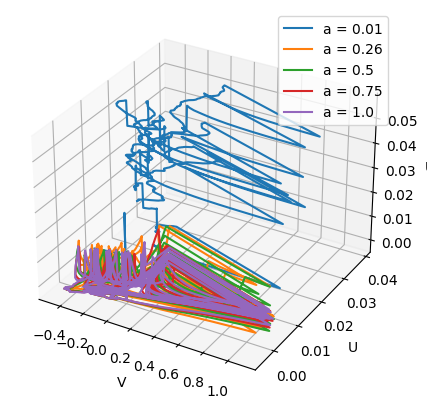

In [6]:
# Influence du paramètre a
n = 5
length = int(len(time)/2)
fig,ax = plt.subplots(1, 1, figsize=(5,5), subplot_kw={"projection":"3d"})
for i,j in enumerate(np.linspace(0.01, 1, n)) :
    V, U = RQIF(time=time, I=I, a=j, b=0.01, c=0.01, d=0.01)
    ax.plot(V[:length], U[:length], U[length:], label=f"a = {round(j,2)}")
    ax.set_xlabel("V")
    ax.set_ylabel("U")
    ax.set_zlabel("U")
    ax.legend()
plt.show()

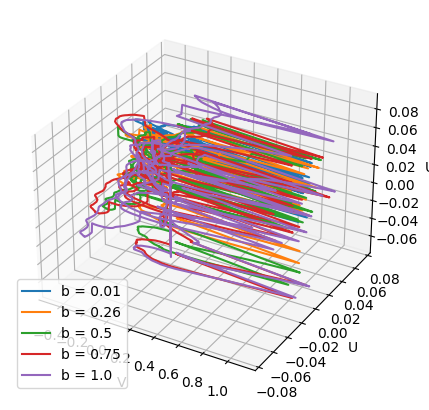

In [7]:
# Influence du paramètre b
n = 5
length = int(len(time)/2)
fig,ax = plt.subplots(1, 1, figsize=(5,5), subplot_kw={"projection":"3d"})
for i,j in enumerate(np.linspace(0.01, 1, n)) :
    V, U = RQIF(time=time, I=I, a=0.01, b=j, c=0.01, d=0.01)
    ax.plot(V[:length], U[:length], U[length:], label=f"b = {round(j,2)}")
    ax.set_xlabel("V")
    ax.set_ylabel("U")
    ax.set_zlabel("U")
    ax.legend()
plt.show()

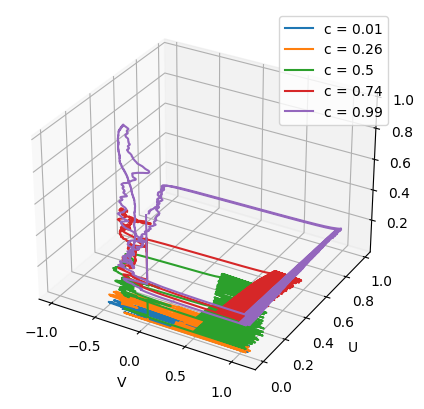

In [8]:
# Influence du paramètre c
n = 5
length = int(len(time)/2)
fig,ax = plt.subplots(1, 1, figsize=(5,5), subplot_kw={"projection":"3d"})
for i,j in enumerate(np.linspace(0.01, 0.99, n)) :
    V, U = RQIF(time=time, I=I, a=0.01, b=0.01, c=j, d=0.01)
    ax.plot(V[:length], U[:length], U[length:], label=f"c = {round(j,2)}")
    ax.set_xlabel("V")
    ax.set_ylabel("U")
    ax.set_zlabel("U")
    ax.legend()
plt.show()

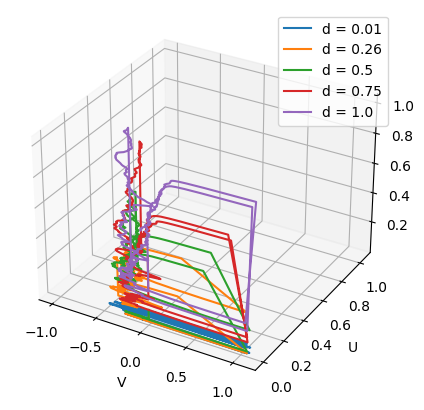

In [9]:
# Influence du paramètre d
n = 5
length = int(len(time)/2)
fig,ax = plt.subplots(1, 1, figsize=(5,5), subplot_kw={"projection":"3d"})
for i,j in enumerate(np.linspace(0.01, 1, n)) :
    V, U = RQIF(time=time, I=I, a=0.01, b=0.01, c=0.01, d=j)
    ax.plot(V[:length], U[:length], U[length:], label=f"d = {round(j,2)}")
    ax.set_xlabel("V")
    ax.set_ylabel("U")
    ax.set_zlabel("U")
    ax.legend()
plt.show()

#### Génération d'une population avec ou sans évènement

In [10]:
# Détermination du nombre de neurone par groupe
nbr=100

# Définition d'une fonction générant une population avec des input variant
# Ajout de la possibilité d'induire un événement factice
def pop(time=time, nbr=nbr, event=False, event_level=0.1) :
    I = np.zeros((len(time), nbr))
    V = np.zeros((len(time), nbr))
    U = np.zeros((len(time), nbr))

    for i in range(nbr):
        I[:,i] = Input(time=time)
        if event == True :
            I[5000:6000,i] += event_level 
        V[:,i], U[:,i] = RQIF(time=time, I=I[:,i])
    
    return V, U

In [11]:
# Généraiton des données
V_WT, U_WT = pop(time=time, nbr=nbr, event=False)
V_EVT, U_EVT = pop(time=time, nbr=nbr, event=True, event_level=0.1)

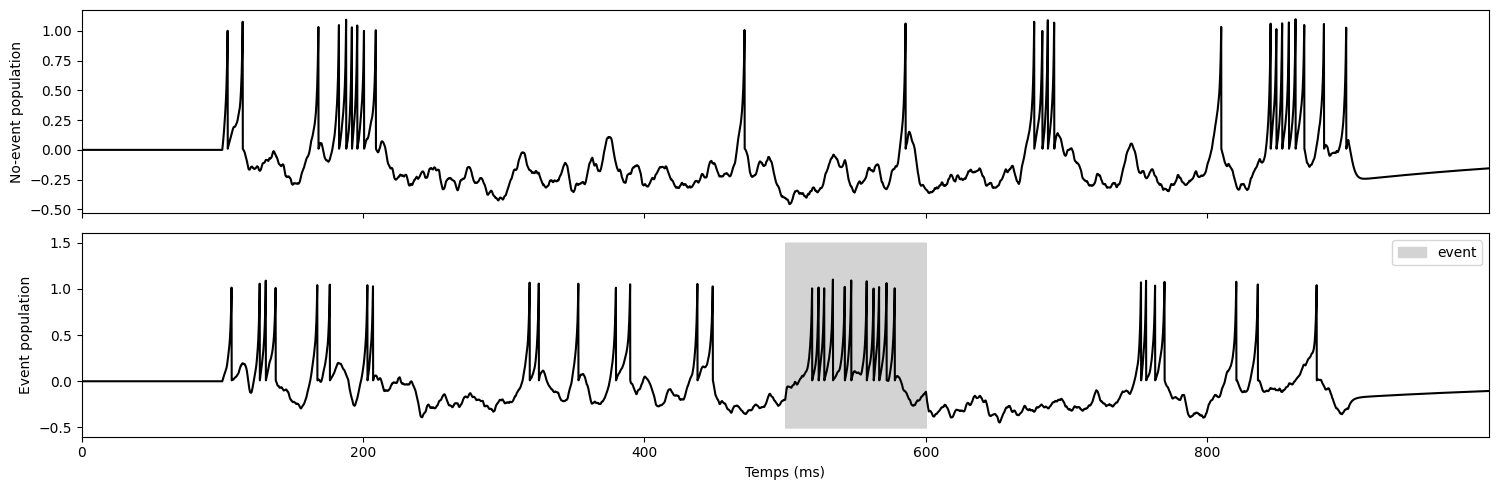

In [12]:
# Représentation graphique des deux populations
fig,ax = plt.subplots(nrows=2, ncols=1, figsize=(15,5), sharex=True)
ax[0].plot(time, V_WT[:,0], color="black")
ax[1].fill_between(time[5000:6000], -0.5, 1.5, color="lightgrey", label="event")
ax[1].plot(time, V_EVT[:,0], color="black")
ax[1].set_xlim(time[0], time[-1])
ax[0].set_ylabel("No-event population")
ax[1].set_ylabel("Event population")
ax[1].set_xlabel("Temps (ms)")
ax[1].legend()
plt.tight_layout()
plt.show()

In [13]:
def count_spike(time=time, DATA=[], lgth_box=500) :
    count = np.zeros((len(time)-lgth_box,DATA.shape[1]))
    for i in range(len(time)-lgth_box) :
        for j in range(DATA.shape[1]) :
            count[i,j] = len(np.where(DATA[i:i+lgth_box,j] >= 1)[0])
    return count.sum(axis=-1)

In [14]:
lgth_box=1000
spike_WT = count_spike(time=time, DATA=V_WT, lgth_box=lgth_box)
spike_EVT = count_spike(time=time, DATA=V_EVT, lgth_box=lgth_box)

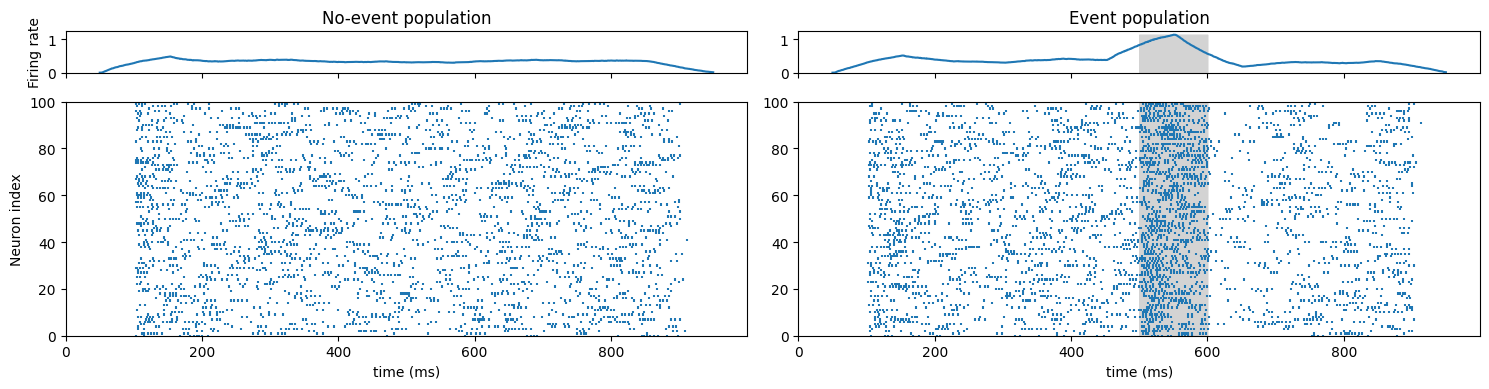

In [15]:
# Autre représentation graphique
fig,ax = plt.subplots(nrows=2, ncols=2, figsize=(15,4), sharex=True, gridspec_kw={"height_ratios":[0.15,0.85]})
### Title
ax[0,0].set_title("No-event population")
ax[0,1].set_title("Event population")
### Countplot
ax[0,0].plot(time[int(lgth_box/2):-int(lgth_box/2)],spike_WT/lgth_box)
ax[0,1].plot(time[int(lgth_box/2):-int(lgth_box/2)],spike_EVT/lgth_box)
ax[0,1].fill_between(x=time[5000:6000], y1=0, y2=np.max([spike_WT/lgth_box,spike_EVT/lgth_box]), 
                     color="lightgrey", label="event")

ax[0,0].set_ylim(0,np.max([spike_WT/lgth_box,spike_EVT/lgth_box])+0.1)
ax[0,1].set_ylim(0,np.max([spike_WT/lgth_box,spike_EVT/lgth_box])+0.1)

ax[0,0].set_ylabel("Firing rate")
### Rasterplot
ax[1,0].eventplot([dt*np.where(V_WT[:,i] >= 1)[0] for i in range(nbr)])
ax[1,1].eventplot([dt*np.where(V_EVT[:,i] >= 1)[0] for i in range(nbr)])
ax[1,1].fill_between(x=time[5000:6000], y1=0, y2=nbr, 
                     color="lightgrey", label="event")

ax[1,0].set_ylabel("Neuron index")
ax[1,0].set_xlabel("time (ms)")
ax[1,1].set_xlabel("time (ms)")
ax[1,0].set_ylim(0, nbr)
ax[1,1].set_ylim(0, nbr)
ax[1,1].set_xlim(time[0], time[-1])

plt.tight_layout()
plt.show()

#### Décodage des activités simulées par apprentissage supervisé

L'apprentissage supervisé est la porte d'entrée de l'apprentissage machine (_"machine learning"_). Le principe de base est très simple, mais il faut en général se le répéter une bonne dizaine de fois pour que ca rentre. Un des exemples simple d'utilisation d'apprentissage supervisé est le décodage. Pour commencer, on part du principe qu'on a des données expérimentales ($X$) qui correspondent à des activités neuronales. Nous avons réalisé ce protocole $n$ fois, ce signifie que nous avons $n$ enregistrement $X$, ce que nous allons écrire comme cela : $X_n$. \
Mais pour ce protocole, nous avions deux conditions : une condition contrôle ($0$) et une condition stimulée ($1$). CHaque activité neuronale ($X_n$) est par conséquent liée à un label ($Y$) qui indique la condition choisie. Nous avons par conséquent $n$ label $Y$ ce que nous allons écrire $Y_n$.

Pour résumer :
- Activité neuronale : $X_n$
- Label de la condition : $Y_n = \{0,1\}$

L'apprentissage machine repose sur l'utilisation de modèle mathématique. Il en existe un grand nombre dont chacun va avoir des spécificités d'utilisation. L'objectif ici va être de retrouver, à partir de l'activité neuronale la condition expérimale qui l'a induite. Ce choix étant binaire et dépendant d'une variable continue, nous allons utilisé un modèle de régression logistique. \
A partir de maintenant, nous allons diviser nos données en deux groupes : un groupe entrainement ($X_{train}$) qui va permettre au modèle de s'entrainer afin de trouver le lien entre les activités et la condition ($X_{train} \rightarrow Y_{train}$) et un groupe de test ($X_{test}$) qui va nous permettre de tester la précision du modèle en comparant les résultats prédit par le modèle ($Y_{pred}$) et la réalité ($Y_{test}$). Bien entendue, plus les prédictions sont proches de la réalité, meilleur est le modèle entrainé !

Si cela est clair pour vous je vous laisse passer à la suite !

In [16]:
# Génération des labels nécessaire pour l'apprentissage supervisé
index_WT = np.zeros(int(nbr))
index_EVT = np.ones(int(nbr))
Index = np.concatenate([index_WT,index_EVT])
V = np.concatenate([V_WT, V_EVT], axis=-1).T

In [17]:
# Importation des modules important pour l'analyse et la représentation
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix
import joblib as jb # Module d'accélération des boucles en répartissant de manière intelligente sur l'ensemble des coeurs du processeur

In [18]:
# Définition d'une fonction réalisant le décoding
def decoding(V=V, Index=Index, cv=10, penalty="l2", test_size=0.15) :
    LR = LogisticRegression(random_state=42, penalty=penalty, max_iter=5000)
    xtrain, xtest, ytrain, ytest = train_test_split(V, Index, 
                                                    test_size=test_size, 
                                                    random_state=42)
    LR.fit(xtrain, ytrain)
    ypred = LR.predict(xtest)
    matrice = confusion_matrix(y_pred=ypred, y_true=ytest)
    score = cross_val_score(LR, V, Index, cv=cv,
                            scoring="balanced_accuracy")
    return score, matrice

In [19]:
# Détermination de la fraction de l'échantillon utilisé pour tester le modèle
test_size = 0.3

# Généraiton des résultats du décodage
score, matrice = decoding(V=V, Index=Index, test_size=test_size)

Cross-validation score = 0.94 +- 0.05


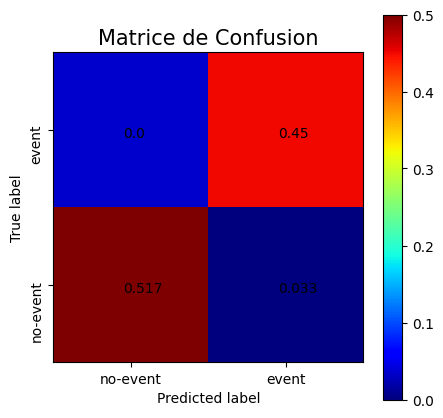

In [20]:
# Représentation des résultats
print("Cross-validation score =",score.mean().round(2),"+-",score.std().round(2))
fig, ax = plt.subplots(figsize=(5,5))
graph = ax.imshow(matrice/(nbr*test_size*2), cmap="jet", 
                  vmin=0, vmax=0.5, origin="lower")
for x in range(2):
    for y in range(2):
        ax.text(x=x-0.05, y=y-0.05, s=str(round(matrice[x,y]/(nbr*test_size*2),3)))
ax.set_title("Matrice de Confusion", size=15)
ax.set_xticks([0,1], ["no-event","event"])
ax.set_yticks([0,1], ["no-event", "event"], rotation=90)
ax.set_xlabel("Predicted label")
ax.set_ylabel("True label")
cbar = fig.colorbar(graph, ax=ax)
cbar.set_label("")
plt.show()

#### Il y a-t-il une influence de la "puissance" de l'évènement sur le décodage ?

In [21]:
# Paramètres et vecteurs créés pour cette analyse
nbr = 50
test_size = 0.3
power = np.linspace(-0.3, 0.3, 11)
Score_mean = np.zeros_like(power)
Score_sd = np.zeros_like(power)

# Boucle faisant varier le niveau de l'évènement
for i, evt_level in enumerate(power) :
    V_WT, U_WT = pop(time=time, nbr=nbr, event=False)
    V_EVT, U_EVT = pop(time=time, nbr=nbr, event=True, event_level=evt_level)

    Index = np.concatenate([np.zeros(int(nbr)), np.ones(int(nbr))])
    V = np.concatenate([V_WT, V_EVT], axis=-1).T

    score, _ = decoding(V=V, Index=Index, test_size=test_size)

    Score_mean[i] = score.mean().round(2)
    Score_sd[i] = score.std().round(2)

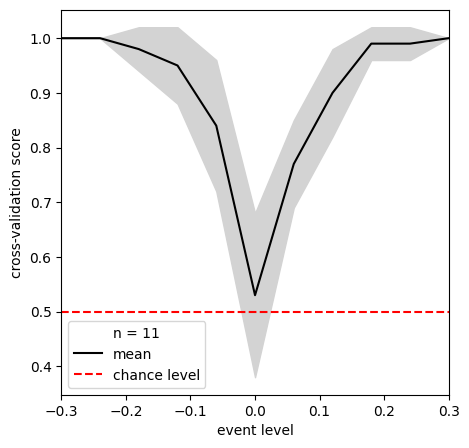

In [22]:
# Représentation graphique
fig,ax = plt.subplots(figsize=(5,5))
ax.fill_between(x=power, y1=Score_mean-Score_sd, 
                y2=Score_mean+Score_sd, color="lightgrey")
ax.plot(power, Score_mean,
        color="black", label="mean")
ax.hlines(y=0.5, xmin=power[0], xmax=power[-1],
          color="red", linestyles="dashed",
          label="chance level")
ax.set_xlim(xmin=power[0], xmax=power[-1])
ax.set_ylabel("cross-validation score")
ax.set_xlabel("event level")
ax.legend(title=f"n = {power.shape[0]}")
plt.show()

In [23]:
# Accélération en utilisant joblib
# Paramètres et vecteurs créés pour cette analyse
nbr = 50
test_size = 0.3
power = np.linspace(-0.3, 0.3, 21)
Score_mean = np.zeros_like(power)
Score_sd = np.zeros_like(power)

# Boucle faisant varier le niveau de l'évènement
def scoring_auto(evt_level):
    V_WT, _ = pop(time=time, nbr=nbr, event=False)
    V_EVT, _ = pop(time=time, nbr=nbr, event=True, event_level=evt_level)

    Index = np.concatenate([np.zeros(int(nbr)), np.ones(int(nbr))])
    V = np.concatenate([V_WT, V_EVT], axis=-1).T

    score, _ = decoding(V=V, Index=Index, test_size=test_size)

    return score.mean().round(2), score.std().round(2)

In [24]:
power = np.linspace(-0.5, 0.5, 51)
Score = jb.Parallel(n_jobs = -1)(jb.delayed(scoring_auto)(event_level) for event_level in power)

In [25]:
Score_mean = np.zeros_like(power)
Score_sd = np.zeros_like(power)
for i in range(np.shape(power)[0]):
    Score_mean[i] = Score[i][0]
    Score_sd[i] = Score[i][1]

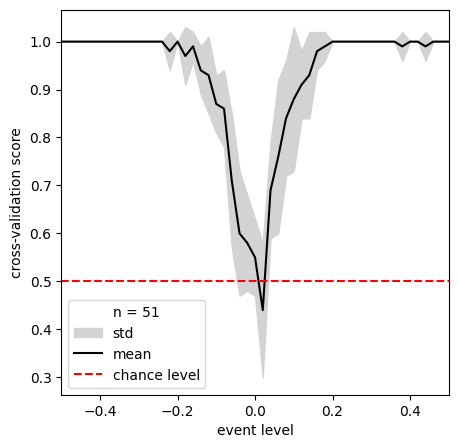

In [26]:
fig,ax = plt.subplots(figsize=(5,5))
ax.fill_between(x=power, y1=Score_mean-Score_sd, 
                y2=Score_mean+Score_sd, color="lightgrey",
                label="std")
ax.plot(power, Score_mean, color="black",
        label="mean")
ax.hlines(y=0.5, xmin=power[0], xmax=power[-1],
          color="red", linestyles="dashed",
          label="chance level")
ax.set_xlim(xmin=power[0], xmax=power[-1])
ax.set_ylabel("cross-validation score")
ax.set_xlabel("event level")
ax.legend(title=f"n = {power.shape[0]}")
plt.show()

#### Est-il possible d'améliorer ce décodage ?
En effet, nous venons de voir que la réussite du décodage dépend de la force du stimulus, néanmoins, de façon général cela ne sera pas le cas... Nous allons donc nous placer dans une position dans laquelle, notre modèle connait un peu de difficultés (*"event_level = 0.08"*), et allons tester de modifier des éléments afin d'améliorer la réussite de décodage.

In [104]:
# Paramètres utilisées
nbr = 500
test_size = 0.15
event_level = 0.03

# Génération des données
V_WT, _ = pop(time=time, nbr=nbr, event=False)
V_EVT, _ = pop(time=time, nbr=nbr, event=True, event_level=event_level)
Index = np.concatenate([np.zeros(int(nbr)), np.ones(int(nbr))])
V = np.concatenate([V_WT, V_EVT], axis=-1).T

# Décodage original
score, _ = decoding(V=V, Index=Index, test_size=test_size)
print("Score = ", round(score.mean(),3),"+-", round(score.std(),3))

Score =  0.601 +- 0.042


In [105]:
height, bin = np.histogram(a=V, bins=15, range=(V.min(),V.max()))
height_evt, bin_evt = np.histogram(a=V_EVT, bins=15, range=(V.min(),V.max()))
height_wt, bin_wt = np.histogram(a=V_WT, bins=15, range=(V.min(),V.max()))

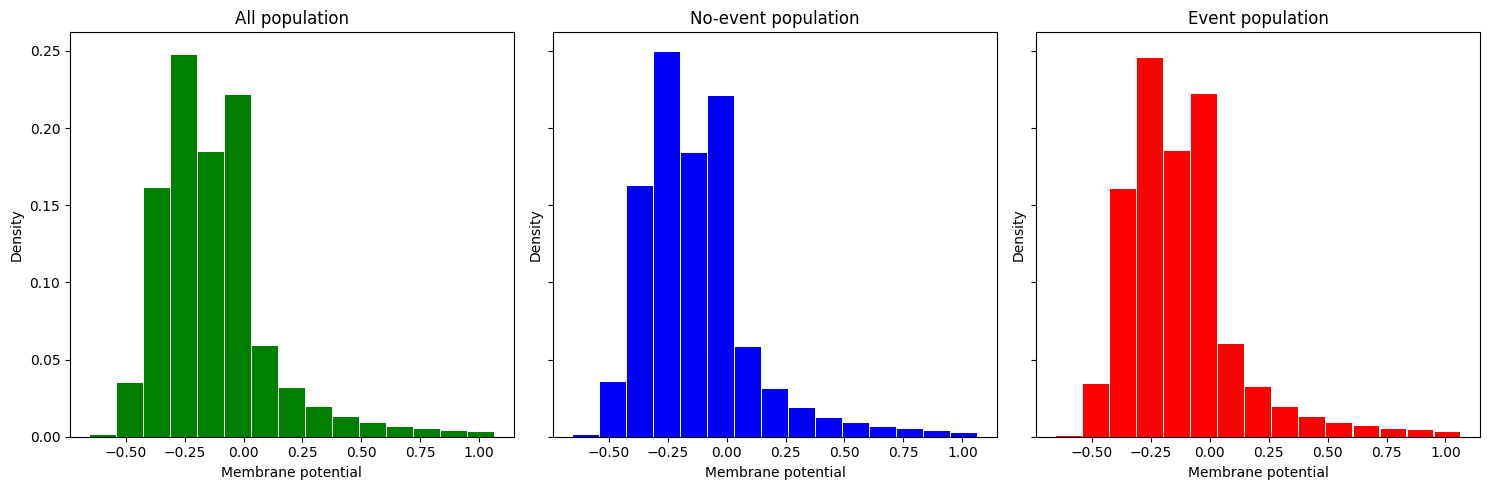

In [106]:
fig,ax = plt.subplots(nrows=1, ncols=3, figsize=(3*5,5), sharex=True, sharey=True)
ax[0].bar(x=bin[:-1], height=height/(nbr*2*time.shape[0]), width=(V.max()-V.min())/16, color="green")
ax[0].set_title("All population")
ax[1].bar(x=bin[:-1], height=height_wt/(nbr*time.shape[0]), width=(V.max()-V.min())/16, color="blue")
ax[1].set_title("No-event population")
ax[2].bar(x=bin[:-1], height=height_evt/(nbr*time.shape[0]), width=(V.max()-V.min())/16, color="red")
ax[2].set_title("Event population")
for i in range(3):
    ax[i].set_xlabel("Membrane potential")
    ax[i].set_ylabel("Density")
plt.tight_layout()
plt.show()

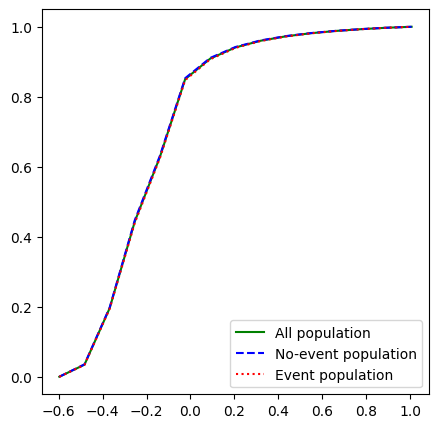

In [107]:
fig,ax = plt.subplots(figsize=(5,5))
ax.plot(bin[:-1], np.cumsum(height/(nbr*2*time.shape[0])),
        color="green", label="All population")
ax.plot(bin[:-1], np.cumsum(height_wt/(nbr*time.shape[0])),
        color="blue", linestyle="dashed", label="No-event population")
ax.plot(bin[:-1], np.cumsum(height_evt/(nbr*time.shape[0])),
        color="red", linestyle="dotted", label="Event population")
ax.legend()
plt.show()

In [108]:
V_i = np.interp(x=V, xp=bin[:-1], fp=height/(nbr*2*time.shape[0]))
V_WT_i = np.interp(x=V_WT, xp=bin[:-1], fp=height_wt/(nbr*time.shape[0]))
V_EVT_i = np.interp(x=V_EVT, xp=bin[:-1], fp=height_evt/(nbr*time.shape[0]))

height_i, bin_i = np.histogram(a=V_i, bins=15, range=(0,1))
height_wt_i, bin_wt_i = np.histogram(a=V_WT_i, bins=15, range=(0,1))
height_evt_i, bin_evt_i = np.histogram(a=V_EVT_i, bins=15, range=(0,1))

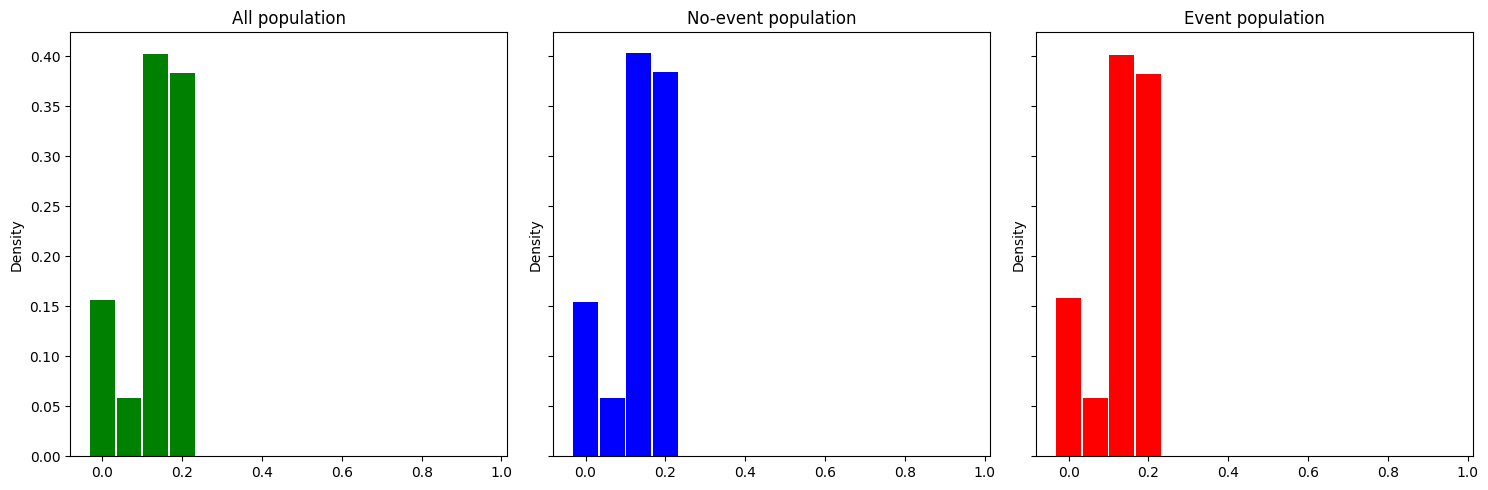

In [109]:
fig,ax = plt.subplots(nrows=1, ncols=3, figsize=(3*5,5), sharex=True, sharey=True)
ax[0].bar(x=bin_i[:-1], height=height_i/(nbr*2*time.shape[0]), width=1/16, color="green")
ax[0].set_title("All population")
ax[1].bar(x=bin_i[:-1], height=height_wt_i/(nbr*time.shape[0]), width=1/16, color="blue")
ax[1].set_title("No-event population")
ax[2].bar(x=bin_i[:-1], height=height_evt_i/(nbr*time.shape[0]), width=1/16, color="red")
ax[2].set_title("Event population")
for i in range(3):
    ax[i].set_ylabel("Density")
plt.tight_layout()
plt.show()

In [110]:
# Décodage sur les données interpolées
score, _ = decoding(V=V_i, Index=Index, test_size=test_size)
print("Score = ", round(score.mean(),3),"+-", round(score.std(),3))

Score =  0.591 +- 0.039
